In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [2]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [5]:
def validStr(value): 
    return isinstance(value, str)

def convertStr(column):
    labelEncoder = LabelEncoder()
    return labelEncoder.fit_transform(column)

def fitLabelEncoderl(data):
    data = np.array(data)
    n_cols = data.shape[1]
    
    for col in range(n_cols):
        if validStr(data[0, col]): 
            data[:, col] = convertStr(data[:, col]) 
    
    return data
        
previsores = fitLabelEncoderl(previsores)

In [6]:
# Dividindo os dados entre treino e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)
x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [7]:
#Criando modelo
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB()

In [8]:
previsores = naive_bayes.predict(x_teste)
previsores

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [9]:
confusao = confusion_matrix(y_teste, previsores)
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [10]:
taxa_acerto = accuracy_score(y_teste, previsores)
taxa_erro = 1 - taxa_acerto
taxa_acerto #Exibindo a taxa de acerto

0.71

0.71

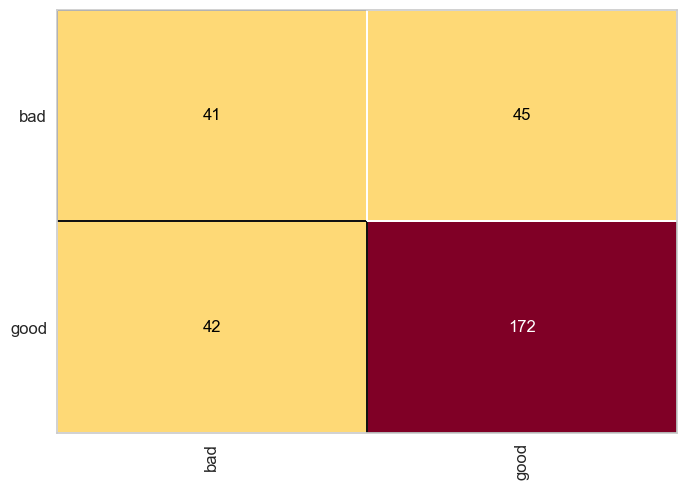

In [11]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)

In [12]:
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [13]:
novo_credito = novo_credito.iloc[:, 0:20].values
novo_credito = fitLabelEncoderl(novo_credito)
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [14]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')